In [173]:
import numpy as np

# Read in csv file for Surgical Deepnet data that is stored in path:
import pandas as pd
from sklearn import metrics
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
train_data = pd.read_csv('PYTHON_LAB_TRAIN.csv')
test_data = pd.read_csv('PYTHON_LAB_DF_TEST_2.csv')

In [50]:
train_data_1 = train_data
train_data_1['LOS'] = np.where(train_data_1['LOS'] > 5.0, 1, 0)

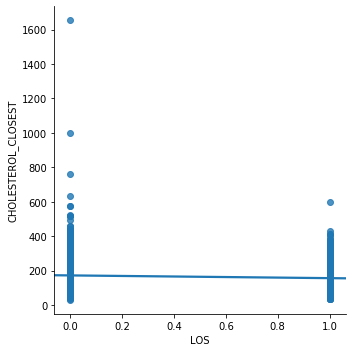

In [51]:
import seaborn as sns

#Scatterplot
sns.lmplot('LOS', 'CHOLESTEROL_CLOSEST', data=train_data_1, fit_reg=True)

In [52]:
d = train_data_1.isna().any()

cols_to_ignore = ['AGE_ON_CONTACT_DATE', 'BP_SYSTOLIC', 'PULSE', 'BP_DIASTOLIC']
d[cols_to_ignore] = False

train_data_1 = train_data_1.loc[:, ~d]

In [53]:
train_data_1.head()

,SCHED_SURG_AREA,PROC_DATE,SCHED_HOSPITAL,CREATE_DT_TM,SCHED_START_DT_TM,SCHED_SURG_PROC_CD,AGE_ON_CONTACT_DATE,BP_SYSTOLIC,BP_DIASTOLIC,PULSE,LOS
0,ALTOR,2/19/2018 0:00,ALT,2/13/2018 20:04,2/19/2018 7:00,3904785,73.3,102.0,70.0,83.0,1
1,NOROB,2/22/2018 0:00,NOR,1/23/2018 9:27,2/22/2018 8:00,576089753,26.1,96.0,58.0,NaN,0
2,SHYOR,3/27/2018 0:00,SHY,3/6/2018 11:02,3/27/2018 7:15,3907499,19.0,NaN,NaN,NaN,0
3,SHYOR,6/8/2017 0:00,SHY,6/6/2017 14:19,6/8/2017 13:00,3907039,74.1,NaN,NaN,NaN,1
4,EASOR,12/20/2017 0:00,EAS,12/7/2017 13:52,12/20/2017 10:00,3907499,57.8,120.0,60.0,NaN,0


In [54]:
train_data_1['PROC_DATE'] = pd.to_datetime(train_data_1['PROC_DATE'])
train_data_1['SCHED_START_DT_TM'] = pd.to_datetime(train_data_1['SCHED_START_DT_TM'])

/Users/rachitajain/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/rachitajain/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
((train_data_1['SCHED_START_DT_TM'][1] - train_data_1['PROC_DATE'][1]).seconds)/3600

#train_data_1['Delay'] = ((train_data_1['SCHED_START_DT_TM'] - train_data_1['PROC_DATE']).seconds)/3600
train_data_1['Delay'] = (pd.to_datetime(train_data_1['SCHED_START_DT_TM']) - pd.to_datetime(train_data_1['PROC_DATE'])).astype('timedelta64[h]') / 3600.0

/Users/rachitajain/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [56]:
train_data_1 = train_data_1.drop(columns=['PROC_DATE', 'SCHED_START_DT_TM', 'CREATE_DT_TM'])

In [57]:
train_data_1.head()

,SCHED_SURG_AREA,SCHED_HOSPITAL,SCHED_SURG_PROC_CD,AGE_ON_CONTACT_DATE,BP_SYSTOLIC,BP_DIASTOLIC,PULSE,LOS,Delay
0,ALTOR,ALT,3904785,73.3,102.0,70.0,83.0,1,0.001944
1,NOROB,NOR,576089753,26.1,96.0,58.0,NaN,0,0.002222
2,SHYOR,SHY,3907499,19.0,NaN,NaN,NaN,0,0.001944
3,SHYOR,SHY,3907039,74.1,NaN,NaN,NaN,1,0.003611
4,EASOR,EAS,3907499,57.8,120.0,60.0,NaN,0,0.002778


In [58]:
train_data_1['SCHED_SURG_AREA'] = train_data_1['SCHED_SURG_AREA'].astype('category')
train_data_1['SCHED_SURG_AREA'] = train_data_1['SCHED_SURG_AREA'].cat.codes

train_data_1['SCHED_SURG_PROC_CD'] = train_data_1['SCHED_SURG_PROC_CD'].astype('category')
train_data_1['SCHED_SURG_PROC_CD'] = train_data_1['SCHED_SURG_PROC_CD'].cat.codes

train_data_1['SCHED_HOSPITAL'] = train_data_1['SCHED_HOSPITAL'].astype('category')
train_data_1['SCHED_HOSPITAL'] = train_data_1['SCHED_HOSPITAL'].cat.codes

In [59]:
train_data_1.head()

,SCHED_SURG_AREA,SCHED_HOSPITAL,SCHED_SURG_PROC_CD,AGE_ON_CONTACT_DATE,BP_SYSTOLIC,BP_DIASTOLIC,PULSE,LOS,Delay
0,2,0,277,73.3,102.0,70.0,83.0,1,0.001944
1,28,12,1243,26.1,96.0,58.0,NaN,0,0.002222
2,40,16,734,19.0,NaN,NaN,NaN,0,0.001944
3,40,16,617,74.1,NaN,NaN,NaN,1,0.003611
4,9,3,734,57.8,120.0,60.0,NaN,0,0.002778


In [60]:
train_data_1 = train_data_1.drop(columns=['LOS'])

In [61]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Train the imputor on the df dataset
imputer = imputer.fit(train_data_1)

# Apply the imputer to the df dataset
imputed_df = imputer.transform(train_data_1.values)

new_df = pd.DataFrame(imputed_df)

In [62]:
new_df.head()

,0,1,2,3,4,5,6,7
0,2.0,0.0,277.0,73.3,102.000000,70.000000,83.000000,0.001944
1,28.0,12.0,1243.0,26.1,96.000000,58.000000,78.685965,0.002222
2,40.0,16.0,734.0,19.0,128.384178,76.327466,78.685965,0.001944
3,40.0,16.0,617.0,74.1,128.384178,76.327466,78.685965,0.003611
4,9.0,3.0,734.0,57.8,120.000000,60.000000,78.685965,0.002778


In [63]:
new_df = pd.concat([new_df, train_data['LOS']], axis=1)

In [64]:
new_df.head()

,0,1,2,3,4,5,6,7,LOS
0,2.0,0.0,277.0,73.3,102.000000,70.000000,83.000000,0.001944,1
1,28.0,12.0,1243.0,26.1,96.000000,58.000000,78.685965,0.002222,0
2,40.0,16.0,734.0,19.0,128.384178,76.327466,78.685965,0.001944,0
3,40.0,16.0,617.0,74.1,128.384178,76.327466,78.685965,0.003611,1
4,9.0,3.0,734.0,57.8,120.000000,60.000000,78.685965,0.002778,0


In [65]:
# Again, we split the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_df.drop(columns = ['LOS']), 
                                                    new_df['LOS'], 
                                                    test_size=0.2, 
                                                    random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1)

In [66]:
import xgboost as xgb

print(x_train.shape, x_val.shape, x_test.shape)

(51200, 8) (12800, 8) (16000, 8)


In [67]:
dtrain = xgb.DMatrix(data = x_train, label = y_train)
dval = xgb.DMatrix(data = x_val, label = y_val)
dtest = xgb.DMatrix(data = x_test, label = y_test)

/Users/rachitajain/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [68]:
param = param = {'booster': 'gbtree',
 'colsample_bytree': 0.8500000000000001,
 'objective':'binary:logistic',
 'eval_metric': 'auc',
 'learning_rate': 0.39,
 'max_depth': 80,
 'maximize': 0,
 'min_child_weight': 75.0,
 'n_thread': 0,
 'n_estimators' : 1000,
 'reg_alpha': 50.0,
 'reg_lambda': 1.22711439376566,
 'scale_pos_weight': 6.586573078664614,
 'subsample': 1.0,
 'verbose': 0,
 'gamma' : 10,
        }

In [69]:
# specify validations set to watch performance
watchlist = [(dtrain, 'train'), (dval, 'eval')]
num_round = 20000 #This is another hyperparameter of sorts
bst = xgb.train(param, dtrain, num_round, watchlist, early_stopping_rounds = 15)

[0]	train-auc:0.762837	eval-auc:0.749802
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 15 rounds.
[1]	train-auc:0.776162	eval-auc:0.761415
[2]	train-auc:0.793544	eval-auc:0.777182
[3]	train-auc:0.8012	eval-auc:0.783239
[4]	train-auc:0.804007	eval-auc:0.784464
[5]	train-auc:0.805132	eval-auc:0.785115
[6]	train-auc:0.813251	eval-auc:0.791133
[7]	train-auc:0.815655	eval-auc:0.79341
[8]	train-auc:0.818654	eval-auc:0.796839
[9]	train-auc:0.820715	eval-auc:0.799326
[10]	train-auc:0.821235	eval-auc:0.799752
[11]	train-auc:0.821701	eval-auc:0.800446
[12]	train-auc:0.821967	eval-auc:0.800537
[13]	train-auc:0.822186	eval-auc:0.800526
[14]	train-auc:0.822354	eval-auc:0.800837
[15]	train-auc:0.826452	eval-auc:0.804999
[16]	train-auc:0.826582	eval-auc:0.804996
[17]	train-auc:0.827746	eval-auc:0.80601
[18]	train-auc:0.827755	eval-auc:0.806017
[19]	train-auc:0.828406	eval-auc:0.806563
[20]	train-auc:0.828442	eval-auc:

In [70]:
mort_train_w_preds = x_train
mort_train_w_preds['xgb_probs'] = bst.predict(dtrain)

mort_test_w_preds = x_test
mort_test_w_preds['xgb_probs'] = bst.predict(dtest)

# AUC SCORES:

In [76]:
y = y_test
scores = mort_test_w_preds['xgb_probs']

fpr, tpr, thresholds = metrics.roc_curve(y_train, mort_train_w_preds['xgb_probs'])
metrics.auc(fpr, tpr)

0.8329970253488329

In [72]:
fpr, tpr, thresholds = metrics.roc_curve(y, scores)
metrics.auc(fpr, tpr)

0.8126190938578574

In [73]:
0.8329970253488329 - 0.8126190938578574

0.020377931490975554

The model is neither overfit nor underfit. 

# Evaluation and determining the high risk patients. 

In [74]:
param = param = {'booster': 'gbtree',
 'colsample_bytree': 0.8500000000000001,
 'objective':'binary:logistic',
 'eval_metric': 'aucpr',
 'learning_rate': 0.39,
 'max_depth': 80,
 'maximize': 0,
 'min_child_weight': 75.0,
 'n_thread': 0,
 'n_estimators' : 1000,
 'reg_alpha': 50.0,
 'reg_lambda': 1.22711439376566,
 'scale_pos_weight': 6.586573078664614,
 'subsample': 1.0,
 'verbose': 0,
 'gamma' : 10,
        }

In [75]:
# specify validations set to watch performance
watchlist = [(dtrain, 'train'), (dval, 'eval')]
num_round = 20000 #This is another hyperparameter of sorts
bst = xgb.train(param, dtrain, num_round, watchlist, early_stopping_rounds = 15)

[0]	train-aucpr:0.468929	eval-aucpr:0.457598
Multiple eval metrics have been passed: 'eval-aucpr' will be used for early stopping.

Will train until eval-aucpr hasn't improved in 15 rounds.
[1]	train-aucpr:0.482599	eval-aucpr:0.470738
[2]	train-aucpr:0.50682	eval-aucpr:0.491144
[3]	train-aucpr:0.513934	eval-aucpr:0.496153
[4]	train-aucpr:0.521367	eval-aucpr:0.501299
[5]	train-aucpr:0.524929	eval-aucpr:0.503396
[6]	train-aucpr:0.539613	eval-aucpr:0.515221
[7]	train-aucpr:0.544566	eval-aucpr:0.522004
[8]	train-aucpr:0.552885	eval-aucpr:0.533287
[9]	train-aucpr:0.556871	eval-aucpr:0.538326
[10]	train-aucpr:0.558147	eval-aucpr:0.540232
[11]	train-aucpr:0.559245	eval-aucpr:0.542364
[12]	train-aucpr:0.560335	eval-aucpr:0.540667
[13]	train-aucpr:0.560668	eval-aucpr:0.541125
[14]	train-aucpr:0.560872	eval-aucpr:0.541788
[15]	train-aucpr:0.568157	eval-aucpr:0.549872
[16]	train-aucpr:0.568293	eval-aucpr:0.549939
[17]	train-aucpr:0.570145	eval-aucpr:0.553107
[18]	train-aucpr:0.570116	eval-aucpr:0

In [78]:
mort_train_w_preds['xgb_probs_aucpr'] = bst.predict(dtrain)
mort_test_w_preds['xgb_probs_aucpr'] = bst.predict(dtest)

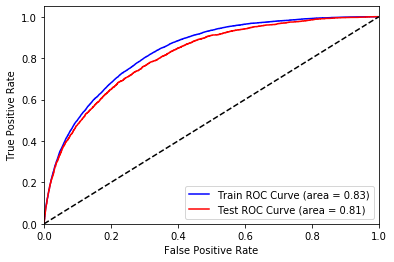

In [79]:
# We can visualize these ROC curves with matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

plt.plot(roc_curve(y_train, mort_train_w_preds['xgb_probs_aucpr'])[0],roc_curve(y_train, mort_train_w_preds['xgb_probs_aucpr'])[1], 
         color = 'blue', label='Train ROC Curve (area = %0.2f)' % roc_auc_score(y_train, mort_train_w_preds['xgb_probs_aucpr']))

plt.plot(roc_curve(y_test, mort_test_w_preds['xgb_probs_aucpr'])[0],roc_curve(y_test, mort_test_w_preds['xgb_probs_aucpr'])[1], 
         color = 'red', label='Test ROC Curve (area = %0.2f)' % roc_auc_score(y_test, mort_test_w_preds['xgb_probs_aucpr']))


plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Since this is a medical use case and thus it can be expensive to ignore the false negative cases. They may lead to ignorance towards a potential medical requirement for a patient and thus AUCPR is the best evaluation technique which can be used to deploy the model. Various thresholds can be used to identify the high risk patients from the low risk patients on the basis of AUCPR scores and keeping the threshold to a maximux of 0.5 can reduce the chances of ignoring false negatives. 

In [80]:
mort_train_w_preds['xgb_probs_aucpr'].head()

36116    0.738766
13231    0.633627
56836    0.743701
61971    0.726511
1532     0.663151
Name: xgb_probs_aucpr, dtype: float32

In [82]:
mort_train_w_preds

,0,1,2,3,4,5,6,7,xgb_probs,xgb_probs_aucpr
36116,19.0,8.0,1031.0,63.100000,158.000000,90.000000,115.000000,0.003889,0.738766,0.738766
13231,29.0,12.0,652.0,58.550577,128.384178,76.327466,78.685965,0.003611,0.633627,0.633627
56836,29.0,12.0,462.0,74.700000,110.000000,54.000000,99.000000,0.004444,0.743701,0.743701
61971,35.0,14.0,310.0,58.550577,128.384178,76.327466,78.685965,0.002500,0.726511,0.726511
1532,19.0,8.0,992.0,75.300000,135.000000,90.000000,86.000000,0.004167,0.663151,0.663151
...,...,...,...,...,...,...,...,...,...,...
60402,31.0,13.0,55.0,58.550577,128.384178,76.327466,78.685965,0.004167,0.418361,0.418361
40305,24.0,10.0,337.0,76.100000,128.384178,76.327466,78.685965,0.003333,0.576541,0.576541
20656,25.0,11.0,1243.0,38.000000,165.000000,79.000000,78.685965,0.006111,0.236422,0.236422
23621,14.0,5.0,582.0,46.800000,137.000000,83.000000,74.000000,0.002778,0.216753,0.216753


In [84]:
mort_train_w_preds['Risk'] = np.where( mort_train_w_preds['xgb_probs_aucpr']> 5.0, 'High', 'Low')

In [85]:
mort_train_w_preds['Risk']

36116    Low
13231    Low
56836    Low
61971    Low
1532     Low
        ... 
60402    Low
40305    Low
20656    Low
23621    Low
61094    Low
Name: Risk, Length: 51200, dtype: object

# Test Results

In [174]:
d = test_data.isna().any()

cols_to_ignore = ['AGE_ON_CONTACT_DATE', 'BP_SYSTOLIC', 'PULSE', 'BP_DIASTOLIC']
d[cols_to_ignore] = False

test_data = test_data.loc[:, ~d]

In [175]:
test_data['PROC_DATE'] = pd.to_datetime(test_data['PROC_DATE'])
test_data['SCHED_START_DT_TM'] = pd.to_datetime(test_data['SCHED_START_DT_TM'])

In [176]:
((test_data['SCHED_START_DT_TM'][1] - test_data['PROC_DATE'][1]).seconds)/3600

#train_data_1['Delay'] = ((train_data_1['SCHED_START_DT_TM'] - train_data_1['PROC_DATE']).seconds)/3600
test_data['Delay'] = (pd.to_datetime(test_data['SCHED_START_DT_TM']) - pd.to_datetime(test_data['PROC_DATE'])).astype('timedelta64[h]') / 3600.0

In [177]:
test_data = test_data.drop(columns=['PROC_DATE', 'SCHED_START_DT_TM', 'CREATE_DT_TM'])

In [178]:
test_data['SCHED_SURG_AREA'] = test_data['SCHED_SURG_AREA'].astype('category')
test_data['SCHED_SURG_AREA'] = test_data['SCHED_SURG_AREA'].cat.codes

test_data['SCHED_SURG_PROC_CD'] = test_data['SCHED_SURG_PROC_CD'].astype('category')
test_data['SCHED_SURG_PROC_CD'] = test_data['SCHED_SURG_PROC_CD'].cat.codes

test_data['SCHED_HOSPITAL'] = test_data['SCHED_HOSPITAL'].astype('category')
test_data['SCHED_HOSPITAL'] = test_data['SCHED_HOSPITAL'].cat.codes

In [179]:
test_data.head()

,ID1,SCHED_SURG_AREA,SCHED_HOSPITAL,SCHED_SURG_PROC_CD,AGE_ON_CONTACT_DATE,BP_SYSTOLIC,BP_DIASTOLIC,PULSE,Delay
0,1,33,13,857,59.7,140.0,82.0,77.0,0.001944
1,2,27,11,74,84.9,126.0,67.0,79.0,0.002222
2,3,33,13,587,52.2,122.0,78.0,NaN,0.003056
3,4,33,13,440,58.7,113.0,70.0,87.0,0.004167
4,5,26,11,773,28.6,130.0,80.0,NaN,0.004167


In [180]:
final_df = test_data['ID1']

In [185]:
test_data = test_data.drop(columns=['ID1'])

In [186]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Train the imputor on the df dataset
imputer = imputer.fit(test_data)

# Apply the imputer to the df dataset
imputed_df = imputer.transform(test_data.values)

new_df = pd.DataFrame(imputed_df)

In [187]:
new_df.head()

,0,1,2,3,4,5,6,7
0,33.0,13.0,857.0,59.7,140.0,82.0,77.000000,0.001944
1,27.0,11.0,74.0,84.9,126.0,67.0,79.000000,0.002222
2,33.0,13.0,587.0,52.2,122.0,78.0,78.468439,0.003056
3,33.0,13.0,440.0,58.7,113.0,70.0,87.000000,0.004167
4,26.0,11.0,773.0,28.6,130.0,80.0,78.468439,0.004167


In [188]:
dtest = xgb.DMatrix(data = new_df)

In [204]:
new_df['LOS_PROB'] = bst.predict(dtest)

In [206]:
final_df = pd.concat([final_df, new_df['LOS_PROB']], axis=1)

In [207]:
final_df

,ID1,LOS_PROB
0,1,0.687565
1,2,0.703966
2,3,0.713735
3,4,0.892921
4,5,0.355952
...,...,...
11197,11198,0.516077
11198,11199,0.547322
11199,11200,0.596934
11200,11201,0.801949


In [208]:
final_df.to_csv('final_output.csv', sep='\t')